# YouTube Case Study (Text Data Analysis)

## Introduction

This case study analyzes text within the YouTube app. We begin with exploring the data and it's size. Next, we clean the data and prepare it for analysis. We end with analyzing user sentiments, positive comments, and emoji usage.

### Types of Data Analysis

* Sentiment Analysis
* Wordcloud Analysis
* Emoji Analysis
***
## Preparing the Environment

We will import the necessary libraries and read in the data set. 

* Pandas and Numpy - data manipulation
* Seaborn and Matplotlib - data visualization

In [1087]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1088]:
# Read and load CSV data
comments = pd.read_csv(r'UScomments.csv', on_bad_lines = 'skip', low_memory=False)

## Data Exploration 
We will use the following functions to explore the data
* head() - view first 5 rows
* tail() - view last 5 rows
* shape - the amount of rows and columns in data set

In [1090]:
# Display first 5 rows of data set
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [1091]:
# Display last 5 rows of data set
comments.tail()

,video_id,comment_text,likes,replies
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0
691399,EoejGgUNmVU,Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...,0,0


In [1092]:
# Shape of data set
comments.shape

(691400, 4)

There are 691,400 rows and 13 columns.
*** 
## Data Transformation (Cleaning)

We will complete the following steps to clean the data

* use the isnull() and sum() functions to calculate missing comments
* remove rows with missing comments using dropna() function

In [1094]:
# Find out how many rows are missing comment text
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [1095]:
# Transform into acceptable form by deleting rows with empty comments 
comments.dropna(inplace=True)
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## Text Data Analysis

### 1. Sentiment Analysis
This analysis will gauge users' feelings (sentiments) through their comments. We will use polarity as a metric. Polarity is measured from -1 to 1, where -1 is the most negative, 0 is neutral, and 1 is the most positive. 

We will do the following in this analysis:
* import TextBlob function to process textual data
* transform user comments into TextBlob
* find polarity of each comment
* add a polarity column into data set

In [1097]:
# Import necessary functions
from textblob import TextBlob

In [1098]:
# View first six rows of data in comments data frame
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [1099]:
# Transform a comment into a TextBlob
TextBlob("Logan Paul it's yo big day ‼️‼️‼️")

TextBlob("Logan Paul it's yo big day ‼️‼️‼️")

In [1100]:
# Find the polarity of the comment
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [1101]:
# Find the polarity of each row
polarity = []
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except: 
        polarity.append(0)

# Add polarity into data frame and view
comments['polarity'] = polarity
comments.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


### 2. Wordcloud Analysis 
This analysis will provide a graphical representation of text data. The Wordcloud will showcase keywords used on the YouTube platform. 

We will do the following in this analysis: 
* filter comments with a polarity of 1 
* store comments in positive comment data frames
* import Wordcloud to represent text data graphically
* import STOPWORD function to eliminate meaningless words

In [1103]:
# Filter and view comments with positive polarities
filter1 = comments['polarity'] == 1
comments_positive = comments[filter1]
comments_positive.head(5)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


(-0.5, 399.5, 199.5, -0.5)

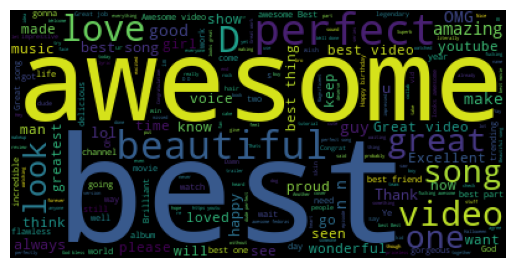

In [1104]:
# Import necessary functions
from wordcloud import WordCloud, STOPWORDS

# Convert series to string
total_comments_positive = ' '.join(comments_positive['comment_text'])

# Generate positive comment wordcloud
wordcloud_pos = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)
plt.imshow(wordcloud_pos)
plt.axis('off')

### Emoji Analysis
This analysis will find the most commonly used emojis on YouTube and present them visually.

We will do the following in this analysis:
* import emoji package
* extract emojis from text
* import counter package
* count emoji instances
* create a bar plot of emojis and their frequencies

In [1106]:
# Import necessary function
!pip install emoji==2.2.0
import emoji

# Extract emojis from comments
emoji_list = []

for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [1107]:
# Count how many times the most used emojis appear
from collections import Counter
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

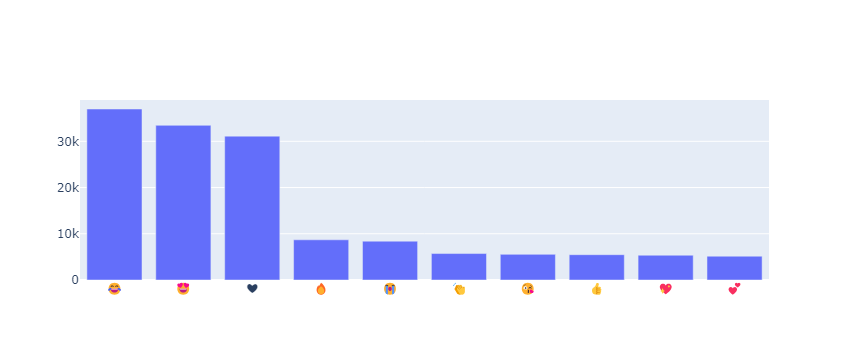

In [1108]:
# Store emojis and frequencies in lists
top_emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]
emoji_frequency = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

# Import necessary functions & create bar plot
import plotly.graph_objs as go
from plotly.offline import iplot

trace = go.Bar(x=top_emojis, y=emoji_frequency)

iplot([trace])

Shan Singh - Data Analytics Real-World Projects in Python